# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [3]:
# Your import
import pandas as pd
import numpy as np


# Load the Pokémon dataset
pokemon_data = pd.read_csv('pokemon.csv') # Your code

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>.

In [4]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# your code

# Select all features + derived
# target: Legendary
# Your code
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rt', 'total_bs', 'sp_attack_to_sp_defense_ratio', 'type']
target = 'legendary'
X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

### 2.2 Data Transformation Using ColumnTransformer

In [5]:
# Your import
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

# Categorical and numerical columns
# your code
categorical_features = ['type']
numerical_features = [col for col in features if col not in categorical_features]
# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code
numerical_tranformer = MaxAbsScaler()
categroical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_tranformer, numerical_features),
        ('cat', categroical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [6]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)



In [7]:
# Your import

# Please use train_test_split to prepare your data

# Your code
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.74509804, 0.40384615, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.17647059, 0.52564103, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.17647059, 0.68589744, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=300,random_state=42)
logistic_model.fit(X_train,y_train)

# Train Logistic Regression
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]

y_val_pred_logistic = logistic_model.predict(X_val)

# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)




print("Miguel Tlatenchi + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Miguel Tlatenchi + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


## Step 4: Multi-Layer Perceptron (MLP)

In [9]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(8,4), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

# Train MLP Classifier


# Evaluate MLP Classifier


print("Miguel Tlatenchi + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Miguel Tlatenchi + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       110
           1       0.80      0.80      0.80        10

    accuracy                           0.97       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.97      0.97      0.97       120

Validation AUC: 0.9773
Validation accuracy: 0.9667


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code
logistic_model = LogisticRegression(
    max_iter=1,
    solver='saga',
    random_state=42,
    warm_start=True
)

# Initialize the model with warm_start to fit incrementally


# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1,500):
    logistic_model.fit(X_train, y_train)
    y_train_prob = logistic_model.predict_proba(X_train)
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

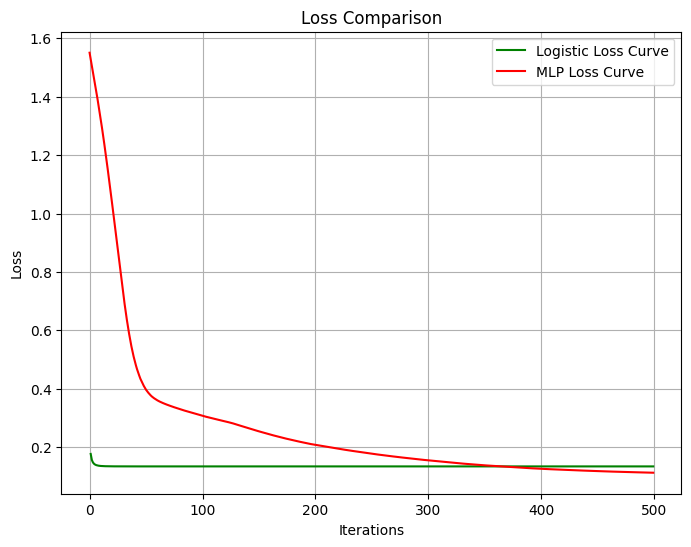

In [11]:
# Extract loss during MLP training
# Your code
mlp_model_loss_curve = mlp_model.loss_curve_
logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code
plt.figure(figsize=(8, 6))
plt.plot(range(1,len(logic_loss) + 1),logic_loss, label='Logistic Loss Curve', color='green')
plt.plot(mlp_model_loss_curve, label='MLP Loss Curve', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()
plt.grid()
plt.show()

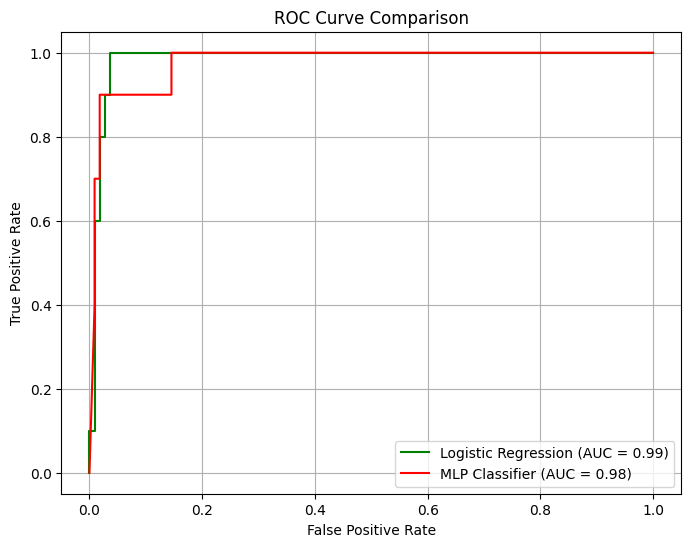

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
# please set color of Logistic as green, set MLP as red.
# Your code
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color='green')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP Classifier (AUC = {auc_val_mlp:.2f})', color='red')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [13]:
# Your idea: Both graphs are illistrating the logistic regression and MLP Classifier but I think that the ROC Curve Comparison does a better
# job at showing the differences in the results. To me, I can see that both MLP and logistic regresssion perform well, but that logistic
# regression seems to slightly outperform MLP.



## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

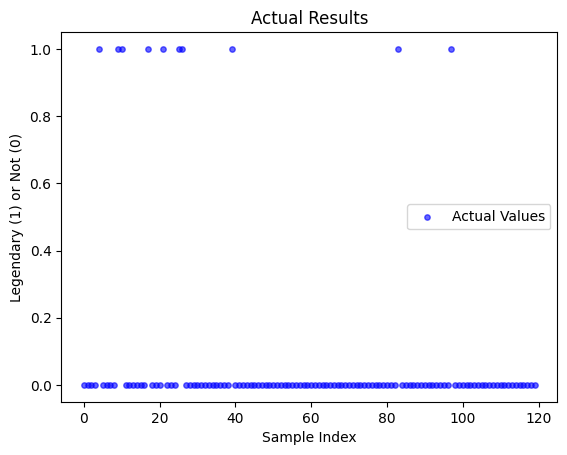

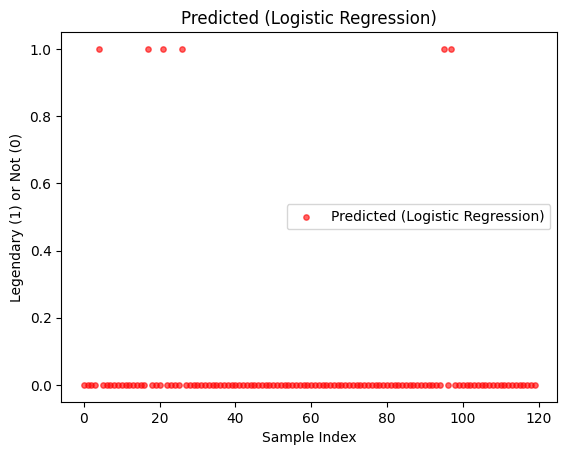

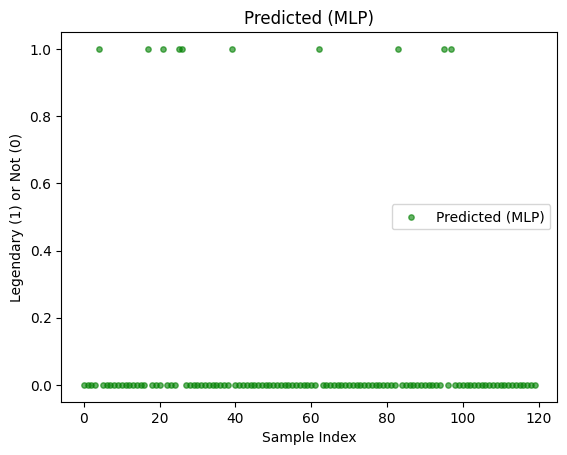

In [14]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
plt.scatter(range(len(y_val)), y_val, label='Actual Values', color='blue',s=15, alpha=0.6)
plt.title("Actual Results")
plt.xlabel('Sample Index')
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.title("Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Predicted (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()


### Confusion Matrices

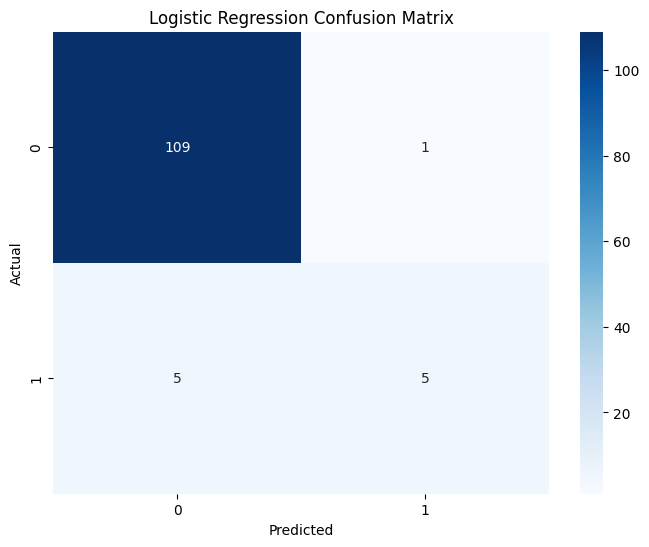

In [15]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression

# your code
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic,annot=True, fmt="d",cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

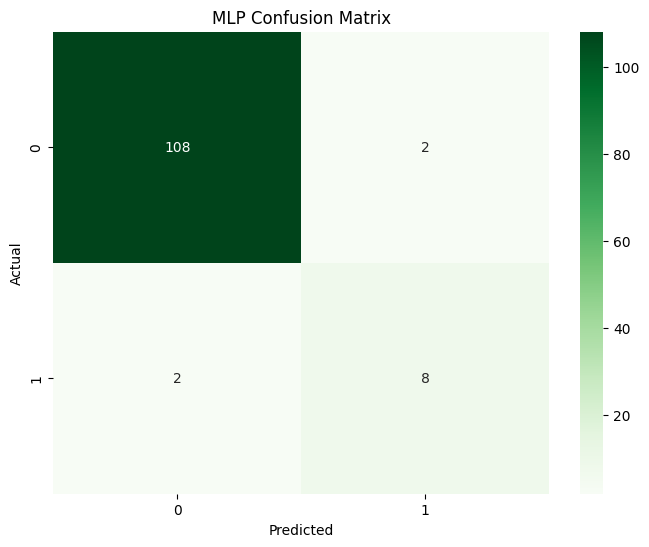

In [16]:
# plot MLP
# Your code
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Conclusion

In [17]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea : I noticed that in this instance, logistic regression was more efficient that MLP was.
# I think that moer iterations might have been needed to improve the performance of MLP.
# However, Both were already very effective since the values were 0.99 and 0.98 so either model could work.
